# Econophysics I
## Exercise 04 - H08

### Juan Camilo Henao Londono
### Universität Duisburg-Essen
15.05.2020

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt

## Exercise 04. Homework 08. Point 04

Additional task: repeat the previous subtask $3$. with a direct simulation of $S$ without It\^{o}'s lemma. Why is $S$ able to jump to an invalid negative value over time for Gaussian distributed $\varepsilon$ if the simulation steps are too large (small $N$)?

In [2]:
def direct_geometric_brownian_motion(t0, t, s0, mu, sigma, N):
    
    delta_t = (t - t0) / N
    epsilon = np.random.normal(size=N) 
        
    t_vec = np.append(t0, t0 + np.cumsum(delta_t * np.ones(N)))
    
    s_vec = 0 * t_vec
    s_vec[0] = s0
    
    for idx_s in range(len(s_vec) - 1):
        s_vec[idx_s + 1] = s_vec[idx_s] + s_vec[idx_s] * mu * delta_t + s_vec[idx_s] * sigma * epsilon[idx_s] * delta_t ** 0.5
    
    return (t_vec , s_vec)

In [3]:
# Initial values

t0 = 0 # years
s0 = 1 # currency
days = 250 # days
t = 20 # years
mu = 0.08
sigma_1 = 0.02 * days ** .5
sigma_2 = 0.005 * days ** .5
N_vec = [10, 30, 100, 300, 1000]

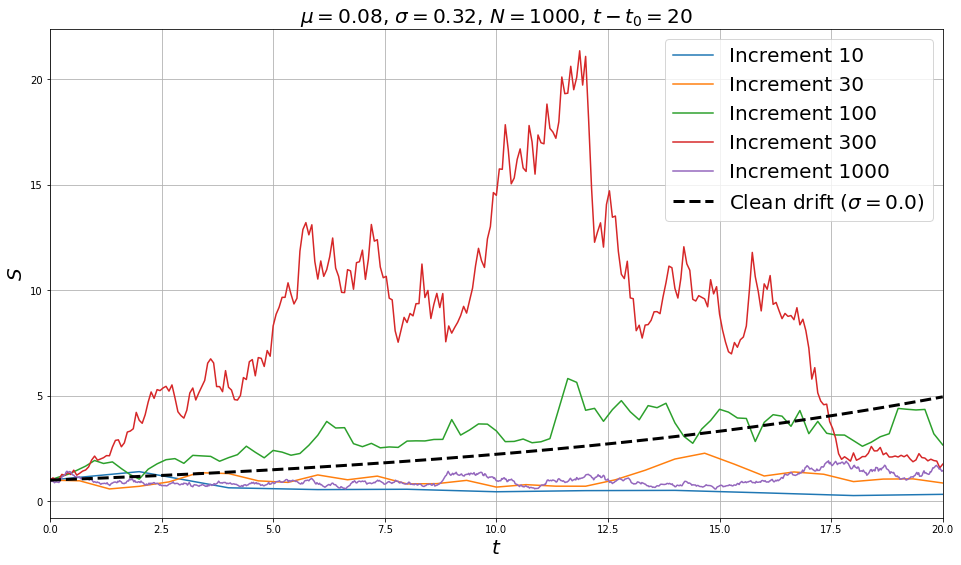

In [4]:
# Figure
fig = plt.figure(figsize=(16,9))

for N in N_vec:
    
    (t_vec, s_vec) = direct_geometric_brownian_motion(t0, t, s0, mu, sigma_1, N)
    plt.plot(t_vec, s_vec, label=f'Increment {N}')
    
# clean drift (sigma = 0)
(t_vec, s_vec) = direct_geometric_brownian_motion(t0, t, s0, mu, 0 * sigma_1, N)
plt.plot(t_vec, s_vec, '--k', linewidth = 3, label='Clean drift ($\sigma = {}$)'.format(0 * sigma_1))

plt.xlabel("$t$", fontsize=20)
plt.ylabel('$S$', fontsize=20)
plt.title(r"$\mu={:.2f}$, $\sigma={:.2f}$, $N={}$, $t - t_0 = {}$".format(mu, sigma_1, N, t - t0), fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.xlim(min(t_vec), max(t_vec))
plt.grid(True)

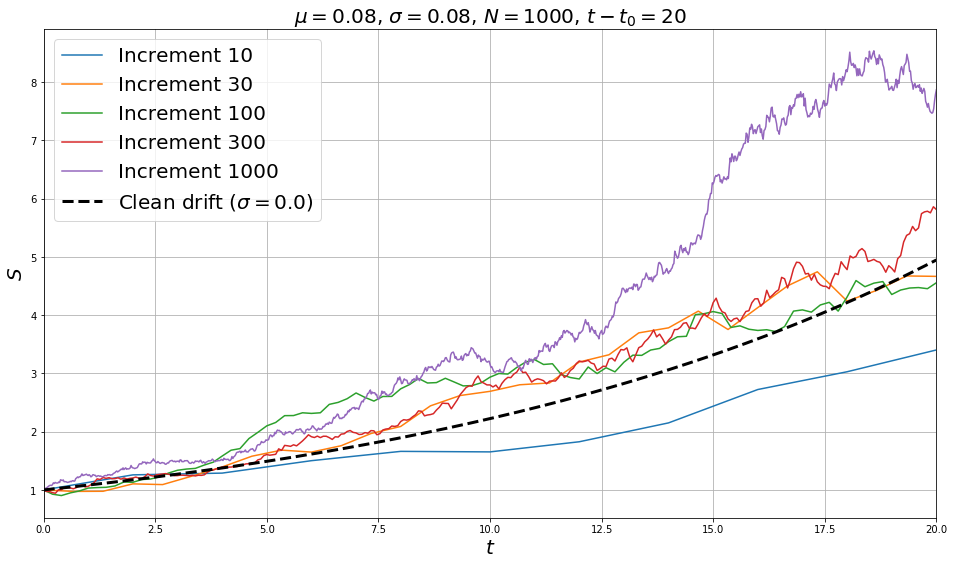

In [5]:
# Figure
fig = plt.figure(figsize=(16,9))

for N in N_vec:
    
    (t_vec, s_vec) = direct_geometric_brownian_motion(t0, t, s0, mu, sigma_2, N)
    plt.plot(t_vec, s_vec, label=f'Increment {N}')
    
# clean drift (sigma = 0)
(t_vec, s_vec) = direct_geometric_brownian_motion(t0, t, s0, mu, 0 * sigma_2, N)
plt.plot(t_vec, s_vec, '--k', linewidth = 3, label='Clean drift ($\sigma = {}$)'.format(0 * sigma_2))

plt.xlabel("$t$", fontsize=20)
plt.ylabel('$S$', fontsize=20)
plt.title(r"$\mu={:.2f}$, $\sigma={:.2f}$, $N={}$, $t - t_0 = {}$".format(mu, sigma_2, N, t-t0), fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.xlim(min(t_vec), max(t_vec))
plt.grid(True)